In [1]:
# Import the os module
import os

import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab
import warnings
import seaborn as sns

#import statsmodels.api as sm
#import statsmodels.formula.api as smf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
#from matplotlib.font_manager import FontProperties
import seaborn as sns

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

#%matplotlib inline
#%matplotlib notebook
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')

data1 = pd.read_csv("h1b_disclosure_data_2015_2019.csv", index_col=False)

In [2]:
!ls -lah

total 41M
drwxrwxrwx 4 root root    9 Sep 21 01:32 .
drwxr-xr-x 1 root root  158 Sep 20 20:49 ..
drwxrwxr-x 2 root root    3 Sep 20 22:37 .deepnote
drwxr-xr-x 6 root root   10 Aug 19 01:53 FGV_Intro_DS
-rw-rw-r-- 1 root root 144M Aug 19 01:29 h1b_disclosure_data_2015_2019.csv
-rw-rw-r-- 1 root root 4.5K Sep 20 22:51 init.ipynb
-rw-rw-r-- 1 root root 1.1M Sep 21 01:32 notebook.ipynb
-rw-rw-r-- 1 root root   29 Sep 20 21:34 requirements.txt
-rw-r--r-- 1 root root    0 Sep 20 21:55 soc_code.txt


# DROPAR CASE NUMBER IGUAL
# JUNTAR SOC_NAME PARECIDOS ETC

In [3]:
soc_code = '17-2141'
soc_name = 'MECHANICAL ENGINEERS'
data1['SOC_NAME'][397759] = soc_name
data1['SOC_CODE'][397759] = soc_code


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
data1[data1["SOC_CODE"] == "SOFTWARE DEVELOPERS, APPLICATIONS"]

dic1 = {"15-1132": "SOFTWARE DEVELOPERS, APPLICATIONS"}
dic2 = {"SOFTWARE DEVELOPERS, APPLICATIONS": "15-1132"}

data1["SOC_CODE"] = data1["SOC_CODE"].replace(dic2) 
data1["SOC_NAME"] = data1["SOC_NAME"].replace(dic1)

In [5]:
data1[data1["SOC_CODE"] == "COMPUTER SYSTEMS ANALYSTS"]

dic1 = {"15-1121": "COMPUTER SYSTEMS ANALYSTS"}
dic2 = {"COMPUTER SYSTEMS ANALYSTS": "15-1121"}

data1["SOC_CODE"] = data1["SOC_CODE"].replace(dic2) 
data1["SOC_NAME"] = data1["SOC_NAME"].replace(dic1)

In [6]:
data1[data1["SOC_CODE"] == "OPERATIONS RESEARCH ANALYSTS"]

dic1 = {"15-2031": "OPERATIONS RESEARCH ANALYSTS"}
dic2 = {"OPERATIONS RESEARCH ANALYSTS": "15-2031"}

data1["SOC_CODE"] = data1["SOC_CODE"].replace(dic2) 
data1["SOC_NAME"] = data1["SOC_NAME"].replace(dic1)

In [7]:
#'13-2011',
#'27-1024',
#'27-3031'

data1[data1["SOC_CODE"] == 273031]

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE


In [8]:
data1[data1["SOC_CODE"] == 132011]
#print(data1[data1["SOC_CODE"] == 271024])

#dic1 = {"15-2031": "OPERATIONS RESEARCH ANALYSTS"}
dic1 = {"13-2011": "ACCOUNTANTS AND AUDITORS", "27-1024": "GRAPHIC DESIGNERS", "27-3031": "PUBLIC RELATIONS SPECIALISTS"}
#}
#ata1["SOC_CODE"] = data1["SOC_CODE"].replace(dic2) 
data1["SOC_NAME"] = data1["SOC_NAME"].replace(dic1)

In [9]:
data1[data1["SOC_CODE"] == 132011]

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE


In [10]:
data1.dropna(inplace = True)

In [11]:
data1['SOC_NAME'] = data1['SOC_NAME'].str.replace('  ',' ')
#data1['SOC_NAME'] = data1['SOC_NAME'].str.replace('WORKERS,','WORKERS')

In [12]:
data1.YEAR = data1.YEAR.astype(str)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857155 entries, 0 to 857212
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CASE_NUMBER          857155 non-null  object 
 1   CASE_STATUS          857155 non-null  object 
 2   EMPLOYER_NAME        857155 non-null  object 
 3   SOC_NAME             857155 non-null  object 
 4   SOC_CODE             857155 non-null  object 
 5   JOB_TITLE            857155 non-null  object 
 6   FULL_TIME_POSITION   857155 non-null  object 
 7   PREVAILING_WAGE      857155 non-null  float64
 8   WORKSITE_CITY        857155 non-null  object 
 9   WORKSITE_STATE_ABB   857155 non-null  object 
 10  YEAR                 857155 non-null  object 
 11  WORKSITE_STATE_FULL  857155 non-null  object 
 12  WORKSITE             857155 non-null  object 
dtypes: float64(1), object(12)
memory usage: 91.6+ MB


In [14]:
data1.info

<bound method DataFrame.info of                CASE_NUMBER          CASE_STATUS  \
0       I-200-09285-514415            CERTIFIED   
1       I-200-09341-564186  CERTIFIED-WITHDRAWN   
2       I-200-09342-274341            CERTIFIED   
3       I-200-09364-425868            CERTIFIED   
4       I-200-10006-413683            WITHDRAWN   
...                    ...                  ...   
857208  I-203-19105-914081            CERTIFIED   
857209  I-200-19043-930707               DENIED   
857210  I-200-19060-000930            CERTIFIED   
857211  I-200-19053-522403            CERTIFIED   
857212  I-200-18282-647333            CERTIFIED   

                                   EMPLOYER_NAME  \
0                                    IT CATS LLC   
1                       XPERT TECHNOLOGIES, INC.   
2                             ISR INFO WAY, INC.   
3           MAGIC CIRCLE FILMS INTERNATIONAL LLC   
4                          SAPHIRE SOLUTIONS INC   
...                                        

In [15]:
states = list(set(data1['WORKSITE_STATE_FULL']))
states_dict = {}
type(states_dict)
count = 1
for i in states:
    states_dict[i] = count
    count +=1

data1['STATE_ID'] = data1['WORKSITE_STATE_FULL'].map(states_dict)
data1['STATE_ID']

0         4
1         4
2         5
3         6
4         6
         ..
857208    2
857209    5
857210    5
857211    6
857212    3
Name: STATE_ID, Length: 857155, dtype: int64

In [16]:
cities = list(set(data1['WORKSITE_CITY']))
cities_dict = {}
type(cities_dict)
count = 1
for i in cities:
    cities_dict[i] = count
    count +=1

data1['CITY_ID'] = data1['WORKSITE_CITY'].map(cities_dict)
data1['CITY_ID']

0         3556
1         7183
2         2723
3         3012
4         6361
          ... 
857208    6927
857209    1187
857210    1187
857211     399
857212    2933
Name: CITY_ID, Length: 857155, dtype: int64

In [17]:
data1['SOC_CODE'] = data1['SOC_CODE'].str.replace("-", "").str.replace(".", "")
data1['SOC_CODE'] = pd.to_numeric(data1['SOC_CODE'])


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


               CASE_NUMBER          CASE_STATUS  \
0       I-200-09285-514415            CERTIFIED   
1       I-200-09341-564186  CERTIFIED-WITHDRAWN   
2       I-200-09342-274341            CERTIFIED   
3       I-200-09364-425868            CERTIFIED   
4       I-200-10006-413683            WITHDRAWN   
...                    ...                  ...   
857208  I-203-19105-914081            CERTIFIED   
857209  I-200-19043-930707               DENIED   
857210  I-200-19060-000930            CERTIFIED   
857211  I-200-19053-522403            CERTIFIED   
857212  I-200-18282-647333            CERTIFIED   

                                   EMPLOYER_NAME  \
0                                    IT CATS LLC   
1                       XPERT TECHNOLOGIES, INC.   
2                             ISR INFO WAY, INC.   
3           MAGIC CIRCLE FILMS INTERNATIONAL LLC   
4                          SAPHIRE SOLUTIONS INC   
...                                          ...   
857208                 

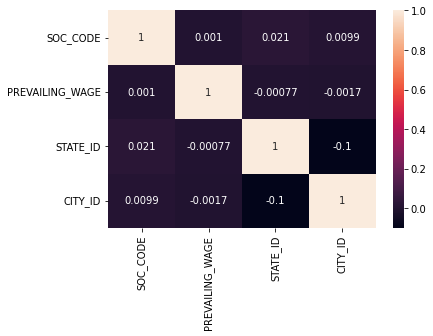

In [18]:
df = pd.DataFrame(data1)
print (df)

corrMatrix = df.corr()
print (corrMatrix)

sns.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
#import pprint as pp
#with open("soc_code.txt", "w") as f:
#    pp.pprint(sorted(list(set(data1["SOC_NAME"]))), f)

In [20]:
from pprint import pprint as pp
import Levenshtein
data1['SOC_NAME'] = data1['SOC_NAME'].str.replace('&','AND')
a = sorted(list(set(data1["SOC_NAME"])))
d = {}
for i in range(len(a) - 1):
    if Levenshtein.distance(a[i], a[i+1]) <= 4:
        d[a[i+1]] = a[i]
    #print (f"[{a[i]}, {a[i+1]}] = {Levenshtein.distance(a[i], a[i+1])}")

data1["SOC_NAME"] = data1["SOC_NAME"].replace(d)

In [21]:
print(len(sorted(list(set(data1["SOC_NAME"])))))

914


In [22]:
sorted(list(set(data1["SOC_NAME"])))

['ACCOUNTANT',
 'ACCOUNTANTS AND AUDITORS',
 'ACTORS',
 'ADMINISTRATIVE SERVICES MANAGERS',
 'ADULT BASIC AND SECONDARY EDUCATION AND LITERACY',
 'ADULT BASIC AND SECONDARY EDUCATION AND LITERACY TEACHERS AND INSTRUCTORS',
 'ADVERTISING AND PROMOTIONS MANAGERS',
 'ADVERTISING SALES AGENTS',
 'AEROSPACE ENGINEERING AND OPERATIONS TECHNICIANS',
 'AEROSPACE ENGINEERS',
 'AGENTS AND BUSINESS MANAGERS OF ARTISTS,',
 'AGENTS AND BUSINESS MANAGERS OF ARTISTS, PERFORMER',
 'AGENTS AND BUSINESS MANAGERS OF ARTISTS, PERFORMERS, AND ATHLETES',
 'AGRICULTURAL AND FOOD SCIENCE TECHNICIANS',
 'AGRICULTURAL ENGINEERS',
 'AGRICULTURAL INSPECTORS',
 'AGRICULTURAL SCIENCES TEACHERS, POSTSECONDARY',
 'AGRICULTURAL WORKERS, ALL OTHER',
 'AIRCRAFT CARGO HANDLING SUPERVISSORS',
 'AIRCRAFT MECHANICS AND SERVICE TECHNICIANS',
 'AIRCRAFT STRUCTURE, SURFACES, RIGGING, AND SYSTEMS',
 'AIRCRAFT STRUCTURE, SURFACES, RIGGING, AND SYSTEMS ASSEMBLERS',
 'AIRFIELD OPERATIONS SPECIALISTS',
 'AIRLINE PILOTS, CO PILOTS A

In [23]:
#import string
#from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.feature_extraction.text import CountVectorizer
#from nltk.corpus import stopwords

#def clean_string(text):
 #   text = ''.join([word for word in text if word not in string.punctuation])
 #   text = text.lower()
 #   text = ' '.join([word for word in text.split() if word not in stopwords])
 #   return text

#cleaned = list(set(data1["SOC_NAME"])) #list(map(clean_string, sentences))
#cleaned

#print(cleaned[:2])
#vectorizer = CountVectorizer().fit_transform(cleaned[:2])
#vectorizer = CountVectorizer().fit_transform(cleaned)
#vectors = vectorizer.toarray()
#vectors

#csim = cosine_similarity(vectors)
#csim

#def cosine_sim_vectors(vec1, vec2):
   # vec1 = vec1.reshape(1,-1)
   # vec2 = vec2.reshape(1,-1)

    #return cosine_sim_vectors(vec1, vec2)[0][0]

#cosine_sim_vectors(vectors[0], vectors[1])
    



In [24]:
data_plot_1 = data1[data1['PREVAILING_WAGE'] > 1000000]
snc = dict(data_plot_1['SOC_NAME'].value_counts())
data_plot_1['SNC'] = data_plot_1['SOC_NAME'].map(snc)
data_plot_1

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE,STATE_ID,CITY_ID,SNC
9681,I-200-14281-060042,DENIED,"SELECT SOURCE INTERNATIONAL, INC.",COMPUTER SYSTEMS ANALYST,151121,PEOPLESOFT HCM ANALYST,Y,172968640.0,MINNEAPOLIS,MN,2015,MINNESOTA,"MINNEAPOLIS, MINNESOTA",2,6644,17
10178,I-200-14282-466434,WITHDRAWN,"SELECT SOURCE INTERNATIONAL, INC.",COMPUTER SYSTEMS ANALYST,151121,PEOPLESOFT HCM ANALYST,Y,172968640.0,MINNEAPOLIS,MN,2015,MINNESOTA,"MINNEAPOLIS, MINNESOTA",2,6644,17
12891,I-200-14294-456530,DENIED,THE OHIO UNIVERSITY,OPERATIONS RESEARCH ANALYST,152031,PROGRAM ANALYST,Y,82937920.0,ATHENS,OH,2015,OHIO,"ATHENS, OHIO",8,3935,3
17854,I-200-14315-617652,DENIED,ERNST & YOUNG U.S. LLP,ACCOUNTANTS AND AUDITORS,132011,ASSURANCE STAFF,Y,99550880.0,PHILADELPHIA,PA,2015,PENNSYLVANIA,"PHILADELPHIA, PENNSYLVANIA",4,7808,1
20591,I-200-14325-696446,DENIED,UNIVERSITY OF ILLINOIS,"AGRICULTURAL SCIENCES TEACHERS, POSTSECONDARY",251041,VISITING ASSISTANT PROFESSOR,Y,83948800.0,URBANA,IL,2015,ILLINOIS,"URBANA, ILLINOIS",5,2915,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826312,I-200-19056-571564,DENIED,"RHOMBUS ENERGY SOLUTIONS, INC.",INDUSTRIAL ENGINEERS,172112,QUALITY CONTROL ENGINEER,Y,138964800.0,Dearborn,MICHIGAN,2019,MICHIGAN,"Dearborn, MICHIGAN",7,311,3
828144,I-200-18278-733090,DENIED,"DETROIT ENGINEERED PRODUCTS, INC.",MECHANICAL ENGINEERS,172141,PROJECT ENGINEER,Y,195164320.0,TROY,MI,2019,MICHIGAN,"TROY, MICHIGAN",7,2064,5
840920,I-200-19008-284946,WITHDRAWN,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,BIOLOGICAL TECHNICIAN,194021,SENIOR RESEARCH TECHNICIAN,Y,81380000.0,New York,NEWYORK,2019,NEW YORK,"New York, NEW YORK",6,5934,1
852030,I-200-19091-821398,WITHDRAWN,THE METROHEALTH SYSTEM,"PHYSICIANS AND SURGEONS, ALL OTHER",291069,PGY-1 PHYSICIAN - PEDIATRICS,Y,114645440.0,Cleveland,OHIO,2019,OHIO,"Cleveland, OHIO",8,4480,1


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  This is separate from the ipykernel package so we can avoid doing imports until


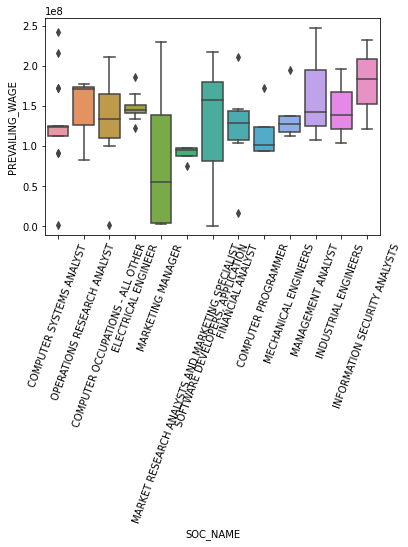

In [25]:
sns.boxplot(data = data_plot_1[data_plot_1['SNC'] > 2], x = 'SOC_NAME', y = 'PREVAILING_WAGE')
plt.xticks(rotation=70)
plt.tight_layout()

In [26]:
data1[data1["PREVAILING_WAGE"] < 100000]

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE,STATE_ID,CITY_ID
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER",151799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA",4,7183
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATION",151132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS",5,2723
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,274032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK",6,3012
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATOR,151142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK",6,6361
5,I-200-10028-460244,CERTIFIED,"SUNERA TECHNOLOGIES, INC",COMPUTER PROGRAMMER,151131,PROGRAMMER ANALYST,Y,61901.0,TROY,MI,2015,MICHIGAN,"TROY, MICHIGAN",7,2064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857208,I-203-19105-914081,CERTIFIED,AERO SPRAY INC.,COMMERCIAL PILOTS,532012,FIRE FIGHTING PILOT,N,83340.0,Appleton,MINNESOTA,2019,MINNESOTA,"Appleton, MINNESOTA",2,6927
857209,I-200-19043-930707,DENIED,FIERI SB INC,HEAVY AND TRACTOR-TRAILER TRUCK DRIVERS,533032,CDL TRUCK DRIVER,Y,54246.0,Elmhurst,ILLINOIS,2019,ILLINOIS,"Elmhurst, ILLINOIS",5,1187
857210,I-200-19060-000930,CERTIFIED,FIERI SB INC,HEAVY AND TRACTOR-TRAILER TRUCK DRIVERS,533032,CDL TRUCK DRIVER,Y,65000.0,Elmhurst,ILLINOIS,2019,ILLINOIS,"Elmhurst, ILLINOIS",5,1187
857211,I-200-19053-522403,CERTIFIED,JETBLUE AIRWAYS,TRANSPORTATION INSPECTORS,536051,SENIOR INVESTIGATOR AIR SAFETY,Y,74152.0,Long Island City,NEWYORK,2019,NEW YORK,"Long Island City, NEW YORK",6,399


In [27]:
data1['PREVAILING_WAGE'] = data1['PREVAILING_WAGE'].replace(0,np.nan)
data1.dropna(inplace= True)
data1

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE,STATE_ID,CITY_ID
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYST,151121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",PA,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA",4,3556
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER",151799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA",4,7183
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATION",151132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS",5,2723
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,274032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK",6,3012
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATOR,151142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK",6,6361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857208,I-203-19105-914081,CERTIFIED,AERO SPRAY INC.,COMMERCIAL PILOTS,532012,FIRE FIGHTING PILOT,N,83340.0,Appleton,MINNESOTA,2019,MINNESOTA,"Appleton, MINNESOTA",2,6927
857209,I-200-19043-930707,DENIED,FIERI SB INC,HEAVY AND TRACTOR-TRAILER TRUCK DRIVERS,533032,CDL TRUCK DRIVER,Y,54246.0,Elmhurst,ILLINOIS,2019,ILLINOIS,"Elmhurst, ILLINOIS",5,1187
857210,I-200-19060-000930,CERTIFIED,FIERI SB INC,HEAVY AND TRACTOR-TRAILER TRUCK DRIVERS,533032,CDL TRUCK DRIVER,Y,65000.0,Elmhurst,ILLINOIS,2019,ILLINOIS,"Elmhurst, ILLINOIS",5,1187
857211,I-200-19053-522403,CERTIFIED,JETBLUE AIRWAYS,TRANSPORTATION INSPECTORS,536051,SENIOR INVESTIGATOR AIR SAFETY,Y,74152.0,Long Island City,NEWYORK,2019,NEW YORK,"Long Island City, NEW YORK",6,399


               CASE_NUMBER          CASE_STATUS  \
0       I-200-09285-514415            CERTIFIED   
1       I-200-09341-564186  CERTIFIED-WITHDRAWN   
2       I-200-09342-274341            CERTIFIED   
3       I-200-09364-425868            CERTIFIED   
4       I-200-10006-413683            WITHDRAWN   
...                    ...                  ...   
857208  I-203-19105-914081            CERTIFIED   
857209  I-200-19043-930707               DENIED   
857210  I-200-19060-000930            CERTIFIED   
857211  I-200-19053-522403            CERTIFIED   
857212  I-200-18282-647333            CERTIFIED   

                                   EMPLOYER_NAME  \
0                                    IT CATS LLC   
1                       XPERT TECHNOLOGIES, INC.   
2                             ISR INFO WAY, INC.   
3           MAGIC CIRCLE FILMS INTERNATIONAL LLC   
4                          SAPHIRE SOLUTIONS INC   
...                                          ...   
857208                 

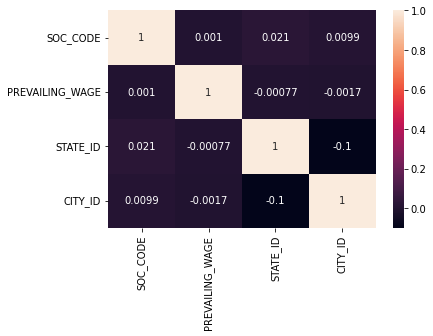

In [28]:
df = pd.DataFrame(data1)
print (df)

corrMatrix = df.corr()
print (corrMatrix)

sns.heatmap(corrMatrix, annot=True)
plt.show()

In [29]:
corrMatrix

,SOC_CODE,PREVAILING_WAGE,STATE_ID,CITY_ID
SOC_CODE,1.000000,0.001032,0.021264,0.009880
PREVAILING_WAGE,0.001032,1.000000,-0.000767,-0.001660
STATE_ID,0.021264,-0.000767,1.000000,-0.100356
CITY_ID,0.009880,-0.001660,-0.100356,1.000000


In [30]:
data1.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'SOC_CODE',
       'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'WORKSITE_CITY',
       'WORKSITE_STATE_ABB', 'YEAR', 'WORKSITE_STATE_FULL', 'WORKSITE',
       'STATE_ID', 'CITY_ID'],
      dtype='object')

In [31]:
data1.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE,STATE_ID,CITY_ID
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYST,151121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",PA,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA",4,3556
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER",151799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA",4,7183
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATION",151132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS",5,2723
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,274032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK",6,3012
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATOR,151142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK",6,6361


In [32]:
data1.describe()

,SOC_CODE,PREVAILING_WAGE,STATE_ID,CITY_ID
count,8.571440e+05,8.571440e+05,857144.000000,857144.000000
mean,2.505080e+05,9.540348e+04,5.297236,3682.212201
std,1.264807e+06,1.755559e+06,1.728513,2238.652600
min,1.090000e+04,4.500000e+03,1.000000,1.000000
25%,1.511210e+05,5.851000e+04,4.000000,1897.000000
50%,1.511320e+05,7.032500e+04,6.000000,2723.000000
75%,1.520310e+05,8.636200e+04,6.000000,5866.000000
max,5.360511e+07,2.977853e+08,8.000000,7999.000000


In [33]:
set(data1["SOC_NAME"])

{'ACCOUNTANT',
 'ACCOUNTANTS AND AUDITORS',
 'ACTORS',
 'ADMINISTRATIVE SERVICES MANAGERS',
 'ADULT BASIC AND SECONDARY EDUCATION AND LITERACY',
 'ADULT BASIC AND SECONDARY EDUCATION AND LITERACY TEACHERS AND INSTRUCTORS',
 'ADVERTISING AND PROMOTIONS MANAGERS',
 'ADVERTISING SALES AGENTS',
 'AEROSPACE ENGINEERING AND OPERATIONS TECHNICIANS',
 'AEROSPACE ENGINEERS',
 'AGENTS AND BUSINESS MANAGERS OF ARTISTS,',
 'AGENTS AND BUSINESS MANAGERS OF ARTISTS, PERFORMER',
 'AGENTS AND BUSINESS MANAGERS OF ARTISTS, PERFORMERS, AND ATHLETES',
 'AGRICULTURAL AND FOOD SCIENCE TECHNICIANS',
 'AGRICULTURAL ENGINEERS',
 'AGRICULTURAL INSPECTORS',
 'AGRICULTURAL SCIENCES TEACHERS, POSTSECONDARY',
 'AGRICULTURAL WORKERS, ALL OTHER',
 'AIRCRAFT CARGO HANDLING SUPERVISSORS',
 'AIRCRAFT MECHANICS AND SERVICE TECHNICIANS',
 'AIRCRAFT STRUCTURE, SURFACES, RIGGING, AND SYSTEMS',
 'AIRCRAFT STRUCTURE, SURFACES, RIGGING, AND SYSTEMS ASSEMBLERS',
 'AIRFIELD OPERATIONS SPECIALISTS',
 'AIRLINE PILOTS, CO PILOTS A

In [34]:
#library(tidyverse)
#library(data.table)
#library(ggplot2)
#library(janitor)
#library(dplyr)
#library(repr) ;
#options(repr.plot.width=10, repr.plot.height = 10)
#options(scipen=999)

#ggplot(data=h1b,aes(x=CASE_STATUS)) +
 # geom_bar(fill="#C3D9B5") +
  #labs(title="Approval/Denial of H-1B Visa's"",
   #    x="Case status",
    #   y="Count") +
 # theme(plot.title = element_text(hjust = 0.5)) +
 # theme(plot.title = element_text(size=19),
  #      axis.text.x = element_text(size= 13, color = 'black'),
   #     axis.text.y = element_text(size = 13, color = 'black'),
    #   axis.title.y = element_text(size = 14, color = 'black'))

Porcentagem de vistos por classificação:

In [35]:
fig = plt.figure(figsize=(7,7))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

sums = data1.CASE_NUMBER.groupby(data1.CASE_STATUS).count()
pie(sums, labels=sums.index, autopct='%.1f%%', textprops={'fontsize': 12})

ax1 = plt.title('Case Status of H-1B Visa',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

Porcentagem de vistos por estado:

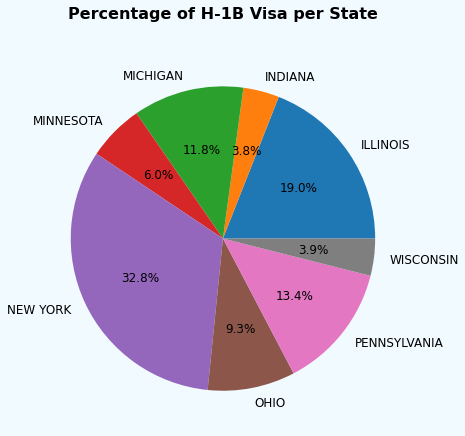

In [36]:
fig = plt.figure(figsize=(7,7))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

sums = data1.CASE_NUMBER.groupby(data1.WORKSITE_STATE_FULL).count()
pie(sums, labels=sums.index, autopct='%.1f%%', textprops={'fontsize': 12})

ax1 = plt.title('Percentage of H-1B Visa per State',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

Classificação de casos por ano:

<AxesSubplot:title={'center':'H1Bs by year'}, xlabel='YEAR'>

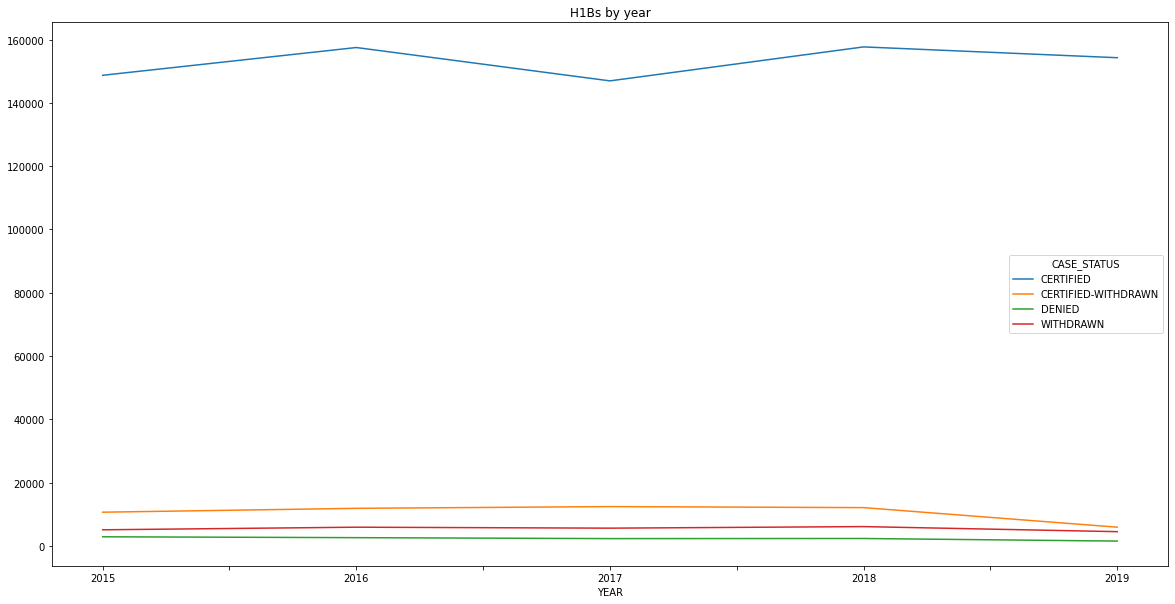

In [37]:
plt.rcParams["figure.figsize"] = (20,10)

pd.crosstab(data1.YEAR,data1.CASE_STATUS).plot(title='H1Bs by year')

Classificação de casos por ano (Desconsiderando casos certificados):

<AxesSubplot:title={'center':'H1Bs by year'}, xlabel='YEAR'>

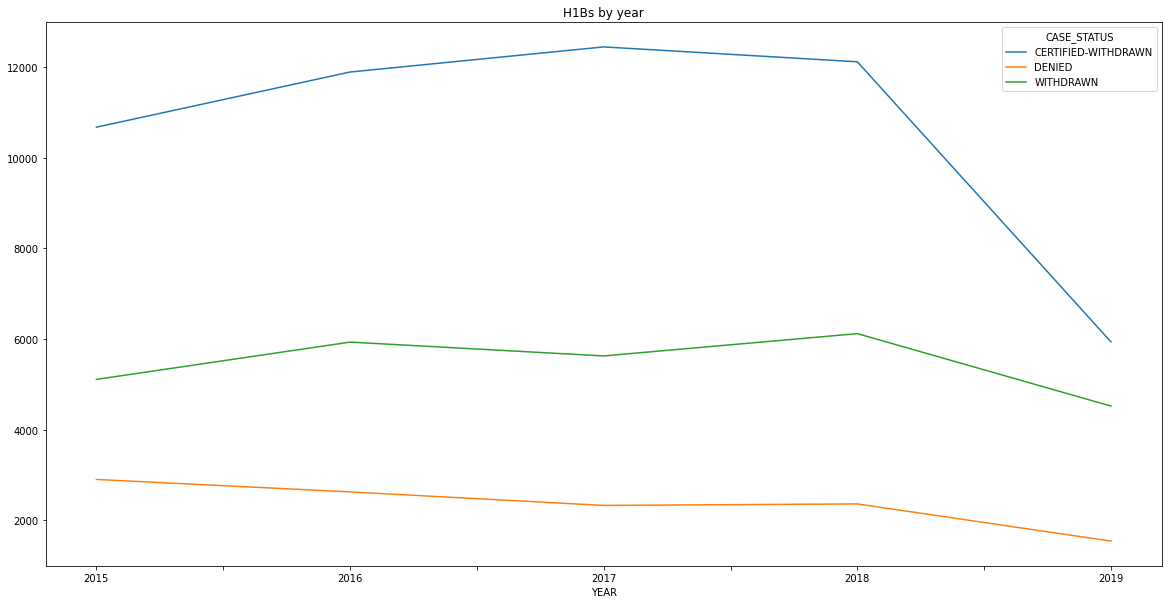

In [38]:
data1_minus_certified=data1[data1.CASE_STATUS!='CERTIFIED']
pd.crosstab(data1_minus_certified.YEAR,data1_minus_certified.CASE_STATUS).plot(title='H1Bs by year')

Quantidade de casos classificados por ano:

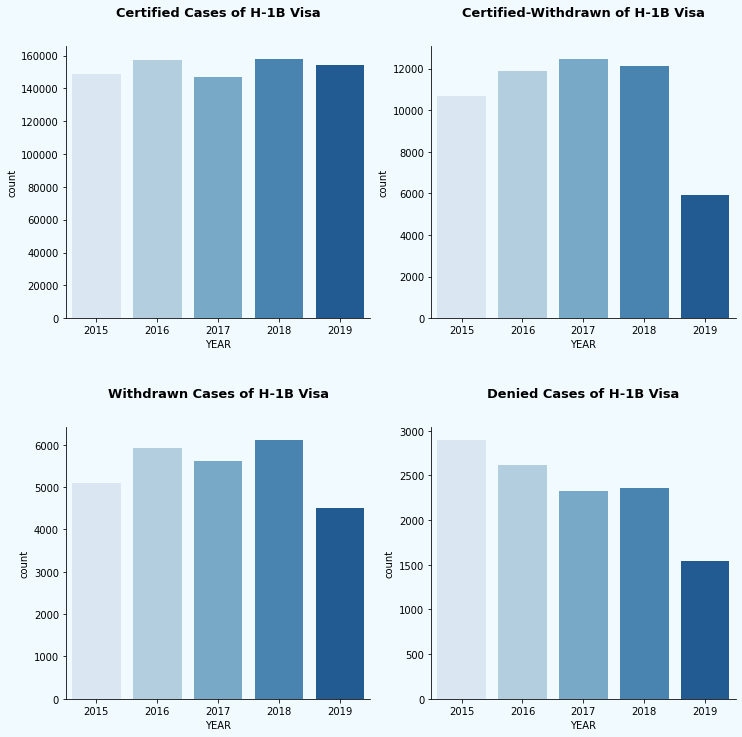

In [39]:
fig = plt.figure(figsize=(12,12))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax1 = plt.subplot(2,2,1)

ax1 = sns.countplot(x="YEAR", data=data1[data1['CASE_STATUS']=="CERTIFIED"], palette= "Blues")
ax1.patch.set_facecolor('#F1FBFF')

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Certified Cases of H-1B Visa',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax2 = plt.subplot(2,2,2)

ax2 = sns.countplot(x="YEAR", data=data1[data1['CASE_STATUS']=="CERTIFIED-WITHDRAWN"], palette= "Blues")
ax2.patch.set_facecolor('#F1FBFF')

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Certified-Withdrawn of H-1B Visa',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax3 = plt.subplot(2,2,3)

ax3 = sns.countplot(x="YEAR", data=data1[data1['CASE_STATUS']=="WITHDRAWN"], palette= "Blues")
ax3.patch.set_facecolor('#F1FBFF')

ax3 = plt.gca().spines['right'].set_visible(False)
ax3 = plt.gca().spines['top'].set_visible(False)
ax3 = plt.gca().spines['left'].set_visible(True)
ax3 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Withdrawn Cases of H-1B Visa',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax4 = plt.subplot(2,2,4)

ax4 = sns.countplot(x="YEAR", data=data1[data1['CASE_STATUS']=="DENIED"], palette= "Blues")
ax4.patch.set_facecolor('#F1FBFF')

ax4 = plt.gca().spines['right'].set_visible(False)
ax4 = plt.gca().spines['top'].set_visible(False)
ax4 = plt.gca().spines['left'].set_visible(True)
ax4 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Denied Cases of H-1B Visa',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

Casos certificados por estado (2015-2019):

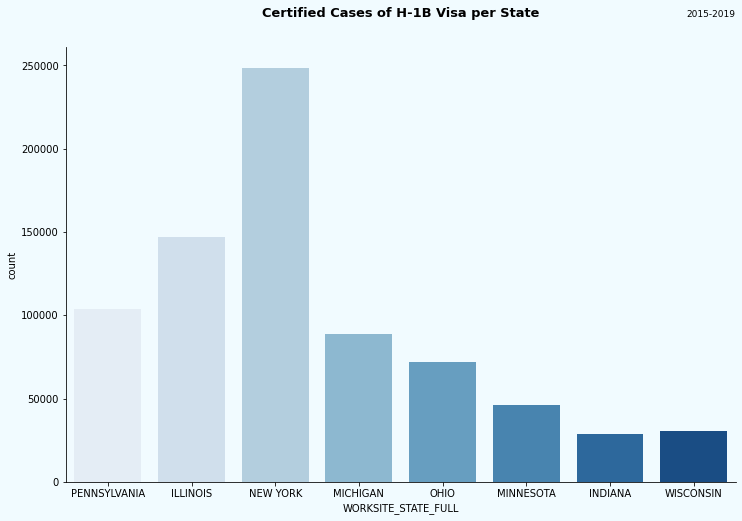

In [40]:
fig = plt.figure(figsize=(12,8))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax1 = sns.countplot(x="WORKSITE_STATE_FULL", data=data1[data1['CASE_STATUS']=="CERTIFIED"], palette= "Blues")
ax1.patch.set_facecolor('#F1FBFF')

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

plt.title('2015-2019', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Certified Cases of H-1B Visa per State',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

Quantidade de casos aprovados em cada estado por ano:

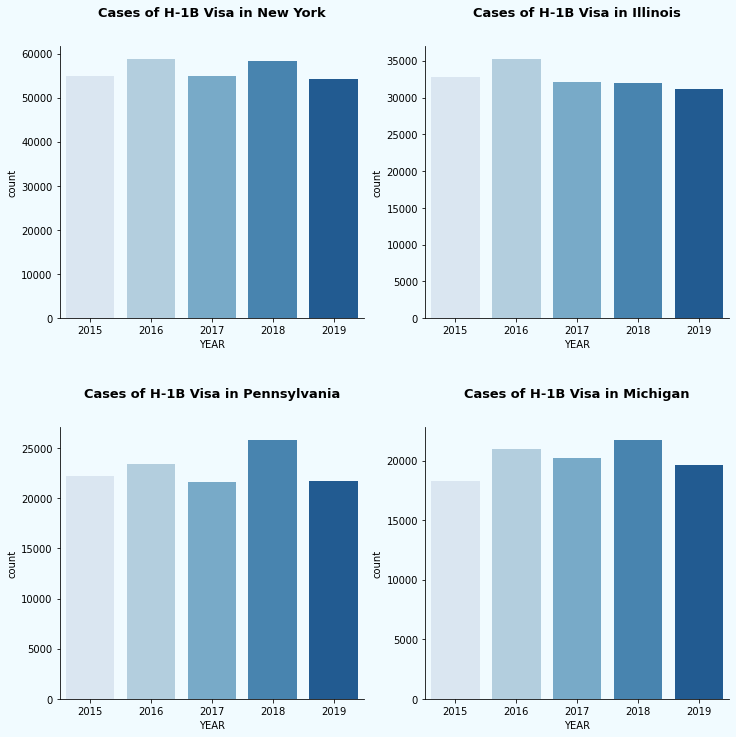

In [41]:
fig = plt.figure(figsize=(12,12))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax1 = plt.subplot(2,2,1)

ax1 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="NEW YORK"], palette= "Blues")
ax1.patch.set_facecolor('#F1FBFF')

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in New York',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax2 = plt.subplot(2,2,2)

ax2 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="ILLINOIS"], palette= "Blues")
ax2.patch.set_facecolor('#F1FBFF')

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Illinois',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax3 = plt.subplot(2,2,3)

ax3 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="PENNSYLVANIA"], palette= "Blues")
ax3.patch.set_facecolor('#F1FBFF')

ax3 = plt.gca().spines['right'].set_visible(False)
ax3 = plt.gca().spines['top'].set_visible(False)
ax3 = plt.gca().spines['left'].set_visible(True)
ax3 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Pennsylvania',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax4 = plt.subplot(2,2,4)

ax4 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="MICHIGAN"], palette= "Blues")
ax4.patch.set_facecolor('#F1FBFF')

ax4 = plt.gca().spines['right'].set_visible(False)
ax4 = plt.gca().spines['top'].set_visible(False)
ax4 = plt.gca().spines['left'].set_visible(True)
ax4 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Michigan',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output


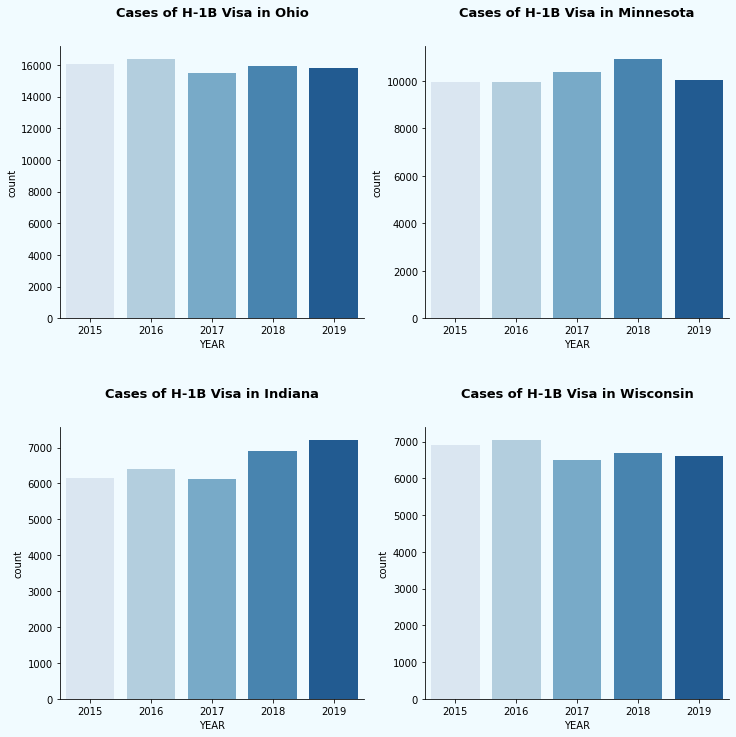

In [42]:
fig = plt.figure(figsize=(12,12))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

ax1 = plt.subplot(2,2,1)

ax1 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="OHIO"], palette= "Blues")
ax1.patch.set_facecolor('#F1FBFF')

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Ohio',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output 


ax2 = plt.subplot(2,2,2)

ax2 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="MINNESOTA"], palette= "Blues")
ax2.patch.set_facecolor('#F1FBFF')

ax2 = plt.gca().spines['right'].set_visible(False)
ax2 = plt.gca().spines['top'].set_visible(False)
ax2 = plt.gca().spines['left'].set_visible(True)
ax2 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Minnesota',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output     


ax3 = plt.subplot(2,2,3)

ax3 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="INDIANA"], palette= "Blues")
ax3.patch.set_facecolor('#F1FBFF')

ax3 = plt.gca().spines['right'].set_visible(False)
ax3 = plt.gca().spines['top'].set_visible(False)
ax3 = plt.gca().spines['left'].set_visible(True)
ax3 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Indiana',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output 


ax4 = plt.subplot(2,2,4)

ax4 = sns.countplot(x="YEAR", data=data1[data1['WORKSITE_STATE_FULL']=="WISCONSIN"], palette= "Blues")
ax4.patch.set_facecolor('#F1FBFF')

ax4 = plt.gca().spines['right'].set_visible(False)
ax4 = plt.gca().spines['top'].set_visible(False)
ax4 = plt.gca().spines['left'].set_visible(True)
ax4 = plt.gca().spines['bottom'].set_visible(True)

plt.title(' ', fontsize = 9, fontweight = 'light',loc='right')
plt.title('Cases of H-1B Visa in Wisconsin',
          fontsize = 13,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output                           

20 empregos mais preenchidos:

<AxesSubplot:>

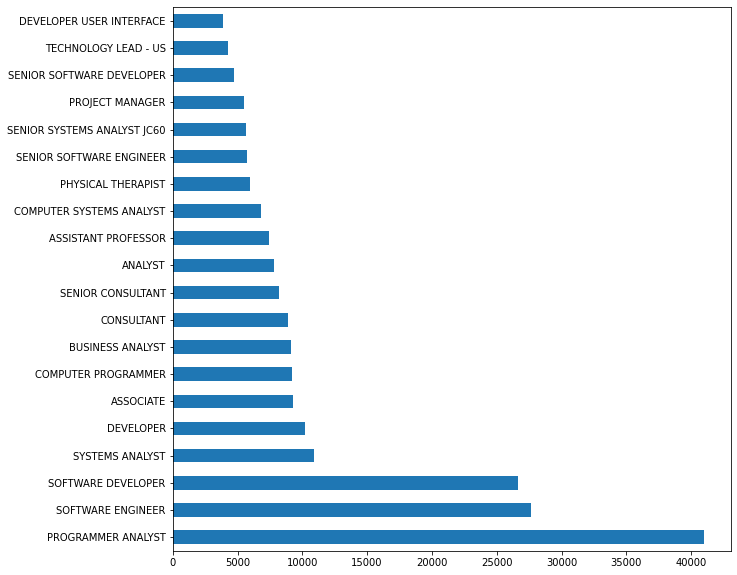

In [43]:
plt.figure(figsize = (10,10))
data1.JOB_TITLE.value_counts()[:20].plot(kind='barh')

20 empresas que contratam mais:

<AxesSubplot:>

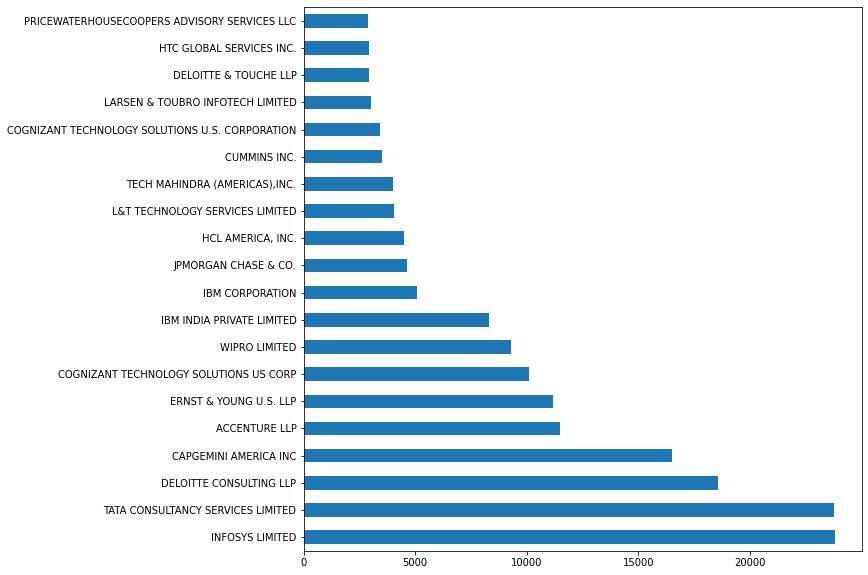

In [44]:
plt.figure(figsize = (10,10))
data1.EMPLOYER_NAME.value_counts()[:20].plot(kind='barh')

10 principais cargos nas 20 empresas que contratam mais:

<AxesSubplot:title={'center':'10 most common jobs of top 20 h1b companies'}, ylabel='JOB_TITLE'>

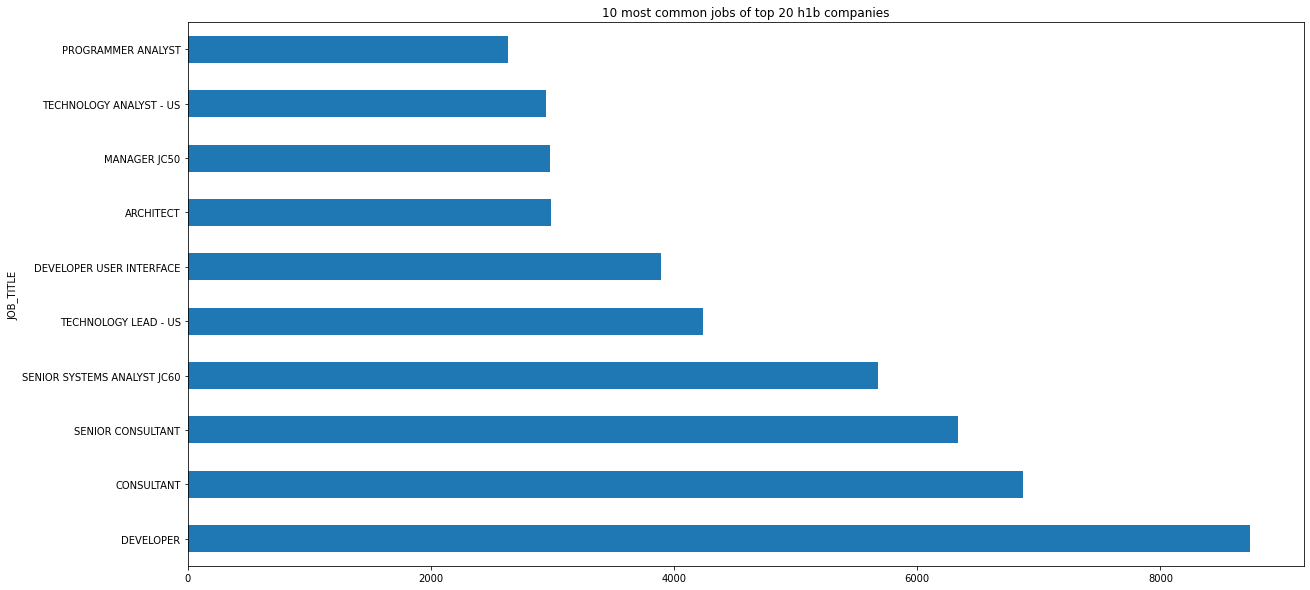

In [45]:
top_20=data1.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_20_df=data1.loc[data1.EMPLOYER_NAME.isin(top_20)]
top_20_df.groupby('JOB_TITLE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='10 most common jobs of top 20 h1b companies')

Maior e menor salários prevalecentes encontrados:

In [46]:
max_wage = data1['PREVAILING_WAGE'].max()
print(max_wage)

min_wage = data1['PREVAILING_WAGE'].min()
print(min_wage)

297785280.0
4500.0


Comparação entre número de empregos de tempo integral ou meio período à aprovação do visto:

In [47]:
pd.crosstab(data1.CASE_STATUS,data1.FULL_TIME_POSITION).plot(kind='barh')

Comparação entre número de empregos de tempo integral ou meio período em relação ao tempo:

<AxesSubplot:title={'center':'Full time position over time'}, xlabel='YEAR'>

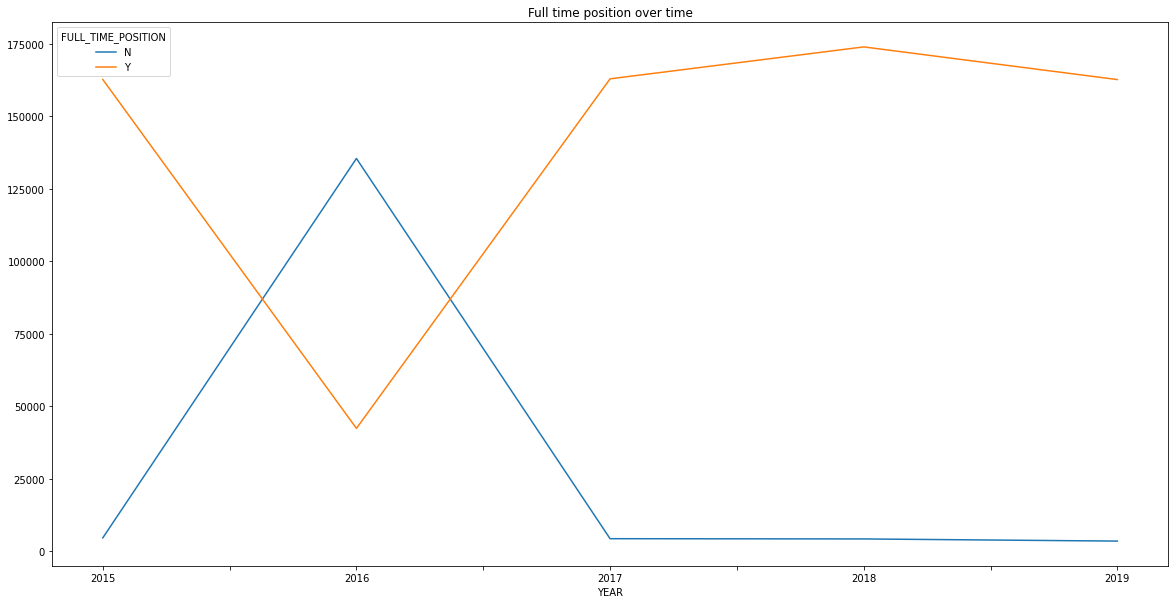

In [48]:
pd.crosstab(data1.YEAR,data1.FULL_TIME_POSITION).plot(title='Full time position over time')

Comparação entre o salário prevalecente dos empregados nos serviços de maior salário nas 20 empresas que contratam mais em comparação com os demais:

([], [])

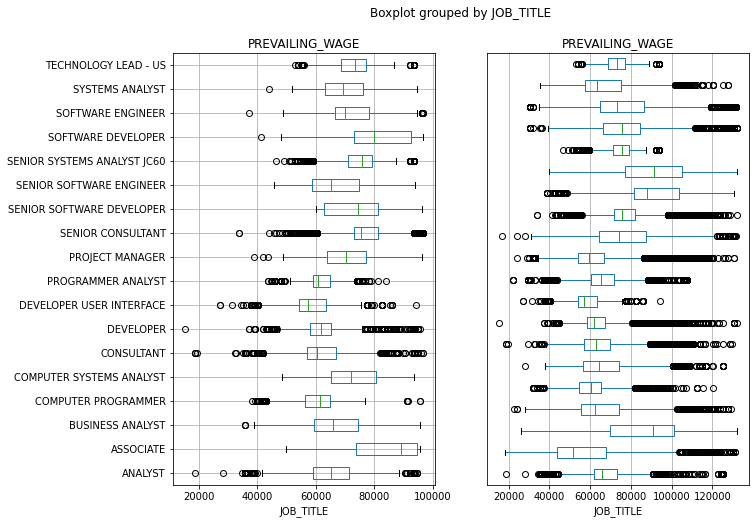

In [49]:
common_jobs=data1.groupby('JOB_TITLE').EMPLOYER_NAME.count().sort_values(ascending=False).index[0:20]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))


top_20_df_common_jobs=top_20_df[top_20_df.JOB_TITLE.isin(common_jobs)]
top_20_df_common_jobs=top_20_df_common_jobs[top_20_df_common_jobs.PREVAILING_WAGE<=top_20_df_common_jobs.PREVAILING_WAGE.quantile(0.99)]
top_20_df_common_jobs.boxplot(column='PREVAILING_WAGE',by='JOB_TITLE',vert=False,ax=axes[0])
data1_common_jobs=data1[data1.JOB_TITLE.isin(common_jobs)]
data1_common_jobs=data1_common_jobs[data1_common_jobs.PREVAILING_WAGE<=data1_common_jobs.PREVAILING_WAGE.quantile(0.99)]

data1_common_jobs.boxplot(column='PREVAILING_WAGE',by='JOB_TITLE',vert=False,ax=axes[1])
plt.yticks([])


Comparação entre o salário prevalecente dos empregados nos serviços de maior salário nas 20 empresas que contratam mais em relação ao tempo:

<AxesSubplot:title={'center':'Prevailing wage of the Top 20 x Other companies'}, xlabel='YEAR'>

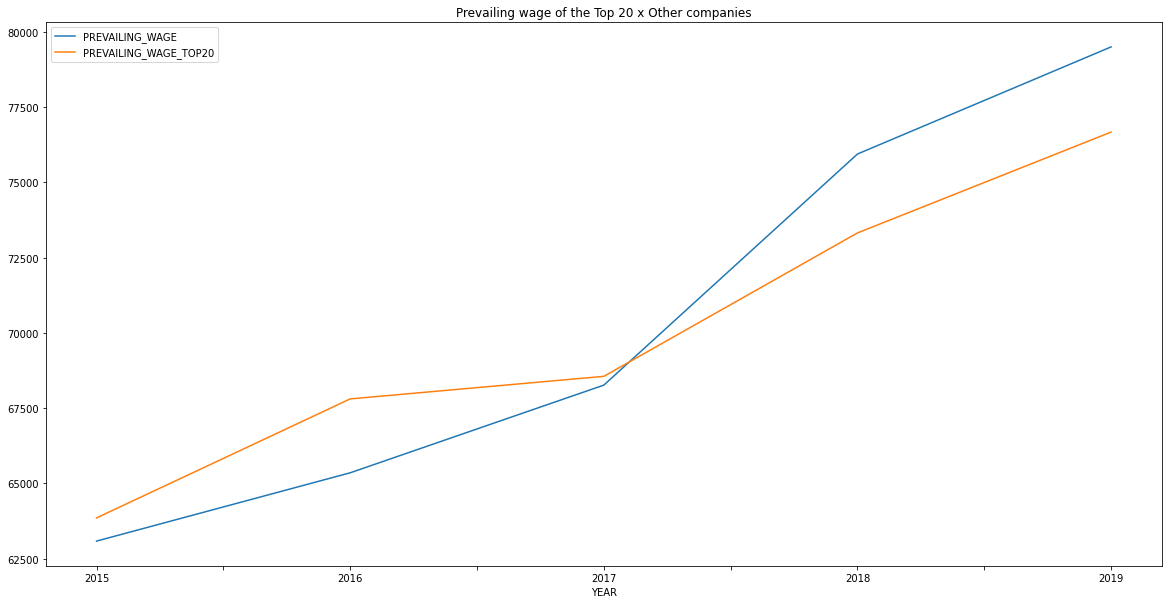

In [50]:
one=data1.groupby('YEAR').PREVAILING_WAGE.median()
two=top_20_df.groupby('YEAR').PREVAILING_WAGE.median()
one=pd.DataFrame(one)
one['PREVAILING_WAGE_TOP20']=two

one.plot(title='Prevailing wage of the Top 20 x Other companies')

               CASE_NUMBER          CASE_STATUS  \
0       I-200-09285-514415            CERTIFIED   
1       I-200-09341-564186  CERTIFIED-WITHDRAWN   
2       I-200-09342-274341            CERTIFIED   
3       I-200-09364-425868            CERTIFIED   
4       I-200-10006-413683            WITHDRAWN   
...                    ...                  ...   
857208  I-203-19105-914081            CERTIFIED   
857209  I-200-19043-930707               DENIED   
857210  I-200-19060-000930            CERTIFIED   
857211  I-200-19053-522403            CERTIFIED   
857212  I-200-18282-647333            CERTIFIED   

                                   EMPLOYER_NAME  \
0                                    IT CATS LLC   
1                       XPERT TECHNOLOGIES, INC.   
2                             ISR INFO WAY, INC.   
3           MAGIC CIRCLE FILMS INTERNATIONAL LLC   
4                          SAPHIRE SOLUTIONS INC   
...                                          ...   
857208                 

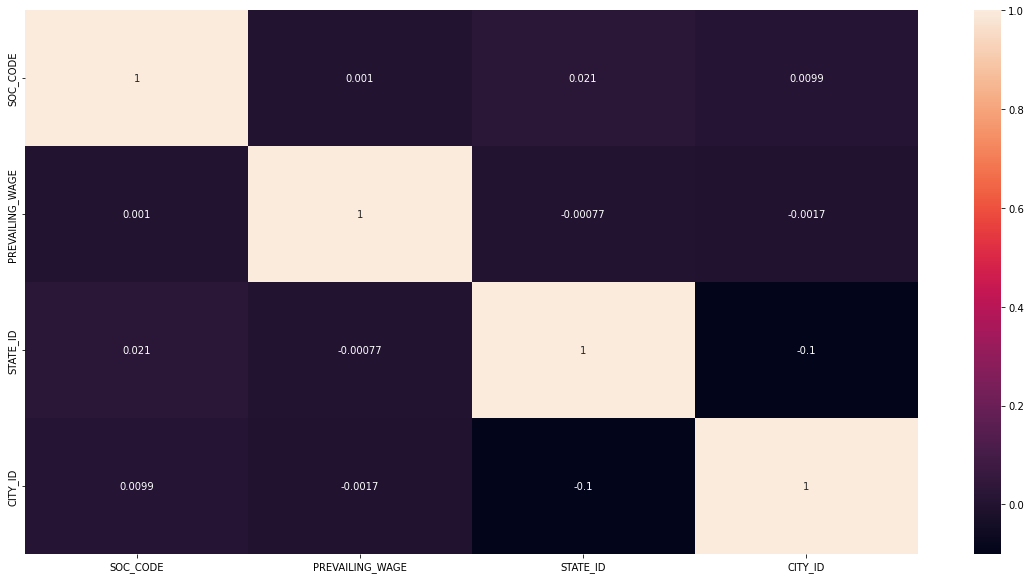

In [51]:
df = pd.DataFrame(data1)
print (df)

corrMatrix = df.corr()
print (corrMatrix)

sns.heatmap(corrMatrix, annot=True)
plt.show()